# Tarea Semanal 5

Yanina Corsaro

Análisis del efecto de desparramo espectral (spectral leakage).

a) Sea k0={N/4,N/4+0.25,N/4+0.5}. Notar que a cada senoidal se le agrega una pequeña desintonía respecto a  Δf. Graficar las tres densidades espectrales de potencia (PDS's) y discutir cuál es el efecto de dicha desintonía en el espectro visualizado.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sen import mi_funcion_sen
import scipy.signal as sig
from scipy.fftpack import fft, fftfreq

mpl.rcParams['figure.figsize'] = (15,7) 

def analisis(ko, i, z):
    
    # parámetros de la senoidal
    N  = 1000 # muestras
    fs = 1000 # Hz
    V = np.sqrt(2)       # Volts
    p0 = 0
    f0 = ko*fs/N    # Hz
    dt = 1/(fs)
    df = fs/N # resolución espectral
    
    y1=240
    y2=260

    # Generamos la senoidal
    tt, xx= mi_funcion_sen( vmax=V , dc=0 , ff=f0 , ph=p0, nn=N , fs=fs )
    ff = np.linspace(0, (N-1), N)*df
    ft_As = fft(xx,N)
    
    if z!= 0:
        xx = np.concatenate((xx, np.zeros(z)))
        N2 = np.size(xx)
        print (N2)
        ff = np.linspace(0, (N2-1), N2)*fs/N2
        ft_As = fft(xx,N2)
        
        #print(xx)
    
    
    xx_var = np.var(xx)
    print(xx_var)  # comprobamos que tiene varianza unitaria
    
    
    ff_os = ff
    
    
    plt.figure(i)
    
    plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2))
    plt.ylabel('Densidad de Potencia [dB]')
    plt.xlabel('Frecuencia [Hz]')
    axes_hdl = plt.gca()
    
    plt.xlim((y1,y2))
    

1.0
0.9989999999987687
0.9999980125269954


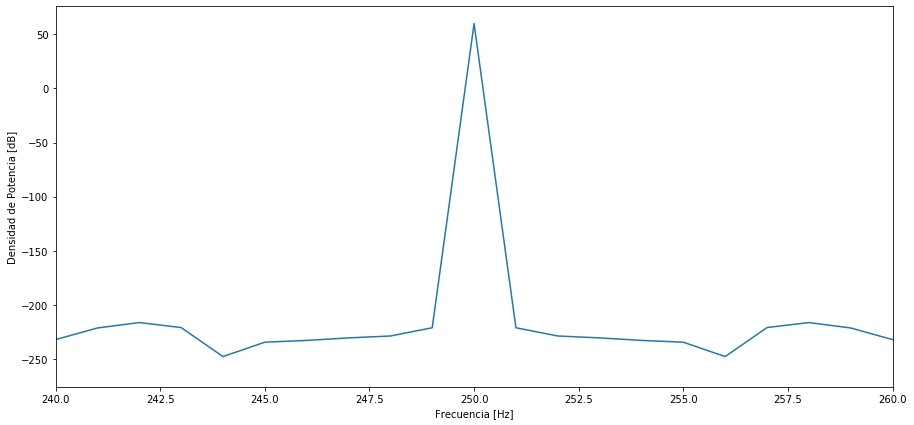

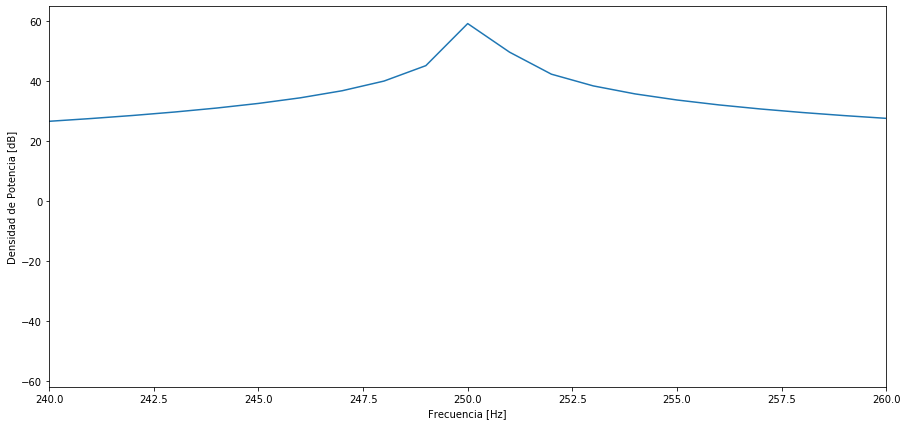

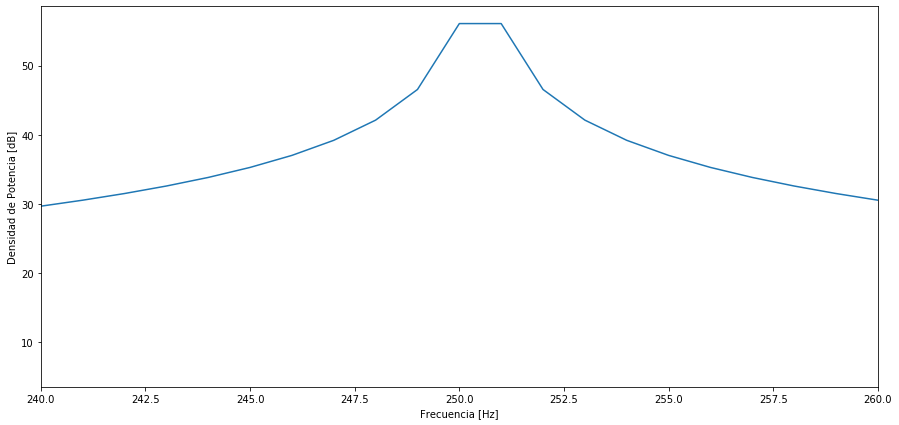

In [51]:
N = 1000

ko=[N/4,N/4+0.25,N/4+0.5]
i=1

for k in ko:
    analisis(k, i, 0)
    i=i+1

b) Verificar la potencia unitaria de cada PSD. En base a la teoría estudiada, ¿cuál es la razón por la cual una señal senoidal tiene un espectro (PSD) tan diferente respecto a otra de muy pocos Hertz de diferencia?

Como verificamos en el punto anterior, tiene potencia unitaria (o muy cercana a 1).

En el primer gráfico, vemos que la energía está concentrada en el bin N/4 (250), ya que el kernel de dirichlet está montado en la señal de análisis.
En cambio en los otros dos casos como f0 no es múltiplo entero de fs/N, la energía se desparrama a los bins adyacentes y se observa el fenómeno de desparramo espectral

C) Repetir el experimento mediante la técnica de zero padding. Dicha técnica consiste en agregar ceros al final de la señal para aumentar Δf de forma ficticia. Probar agregando un vector de 9*N ceros al final. Discuta los resultados obtenidos.

10000
0.10000000000000002
10000
0.09989999999998773
10000
0.09999998012526998


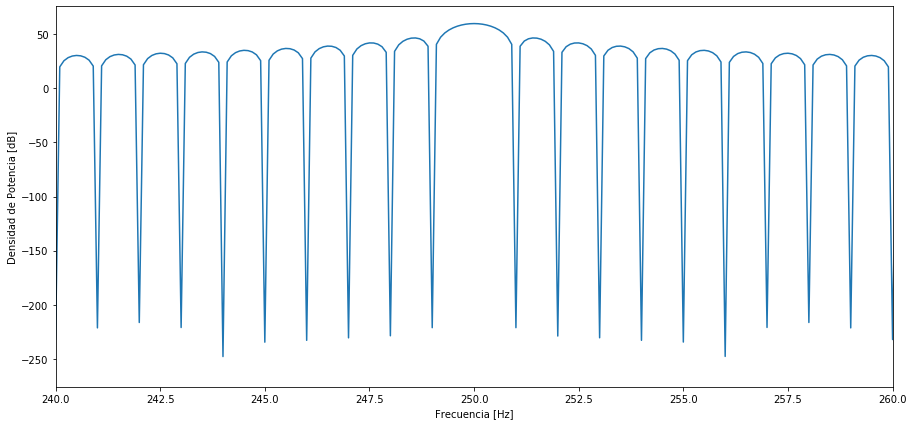

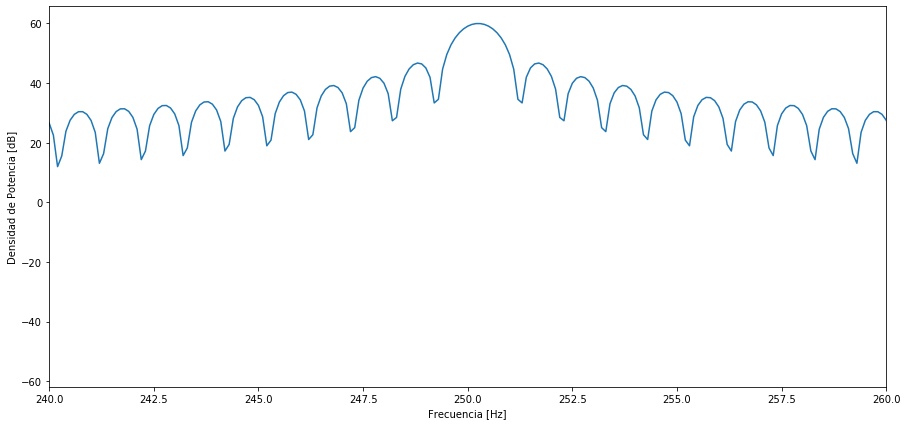

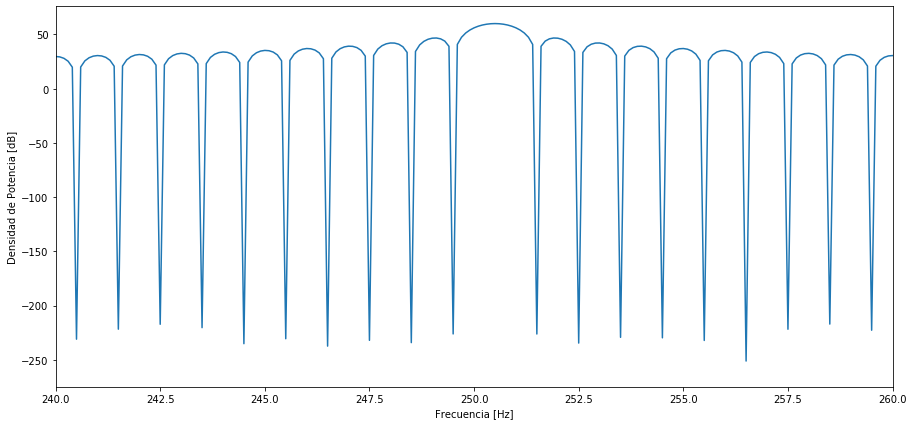

In [50]:
N = 1000

ko=[N/4,(N/4)+0.25,(N/4)+0.5]
i=1

for k in ko:
    analisis(k, i, 9*N)
    i=i+1

Al utilizar la ténica de zero padding podemos ver el kernel de Dirichlet, montado sobre la frecuencia correspondiente.
Para el primer gráfico sobre N/4, para el segundo sobre (N/4)+0.25 y para el tercero sobre (N/4)+0.5